<a href="https://colab.research.google.com/github/RandivCosta/data-analysis/blob/main/regression_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols, glm
from scipy import stats
import warnings

df = pd.read_csv('adjusted_data.csv')

bacterial_types = [
    'BC-Enterococcus (CFU/100ml)',
    'BC-Fecal Coliform(CFU/100ml)',
    'BC-E-Coli (CFU/100ml)'
]

physical_params = [
    'PP-PH',
    'PP-Conductivity',
    'PP-Salinity',
    'PP-Temperature',
    'EP-Rainfall',
    'EP-Wind Speed'
]

# weekly means for each bacterial type and physical parameter
weekly_means = df.groupby(['Week', 'Area']).mean(numeric_only=True).reset_index()
# print(weekly_means)

### Visualization of normality of each parameter for 10 weeks

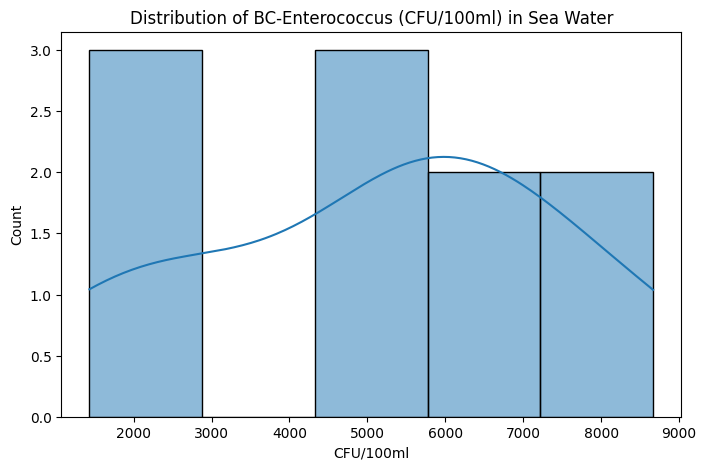

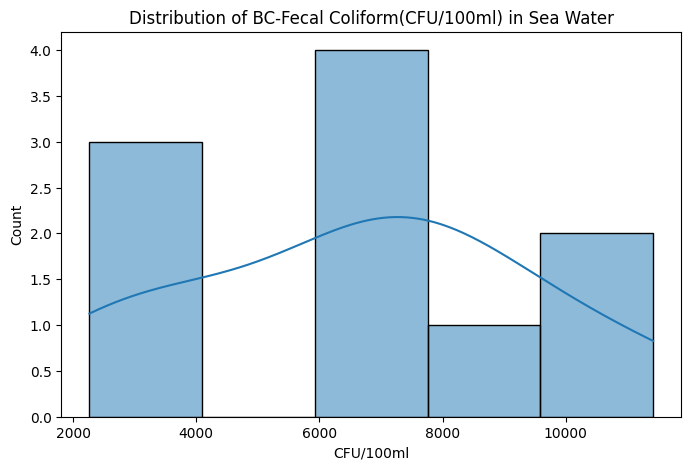

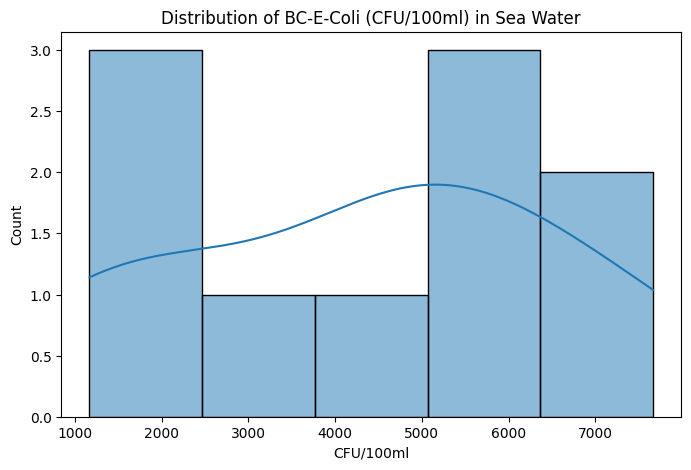

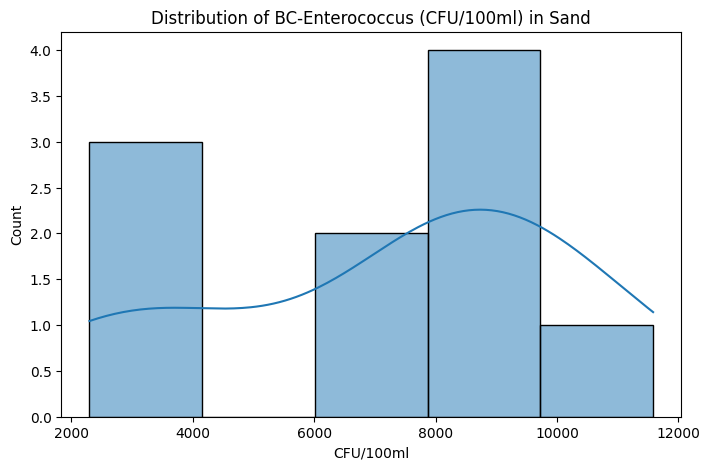

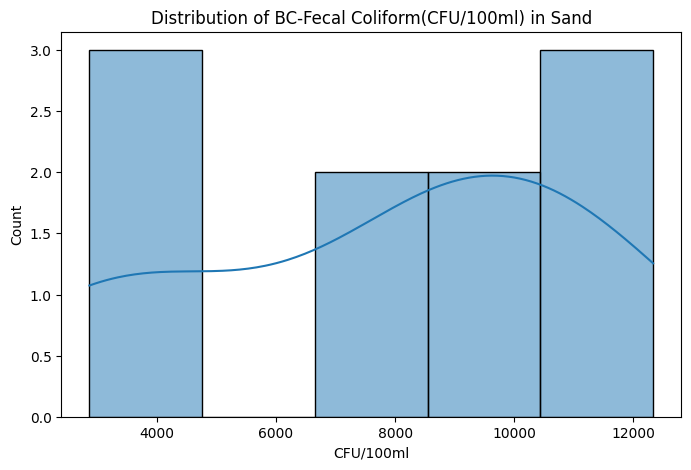

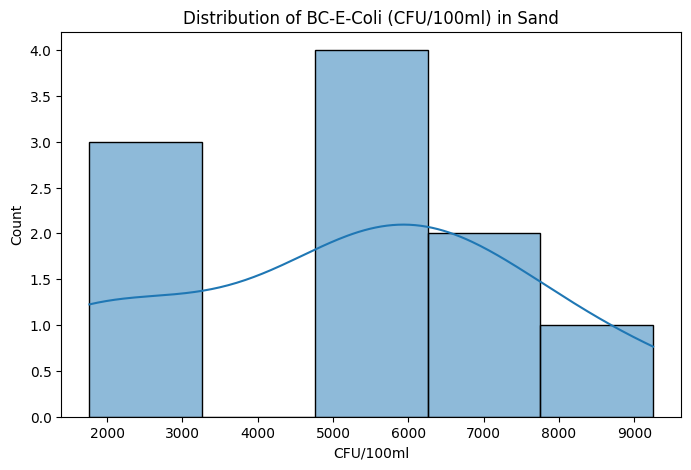

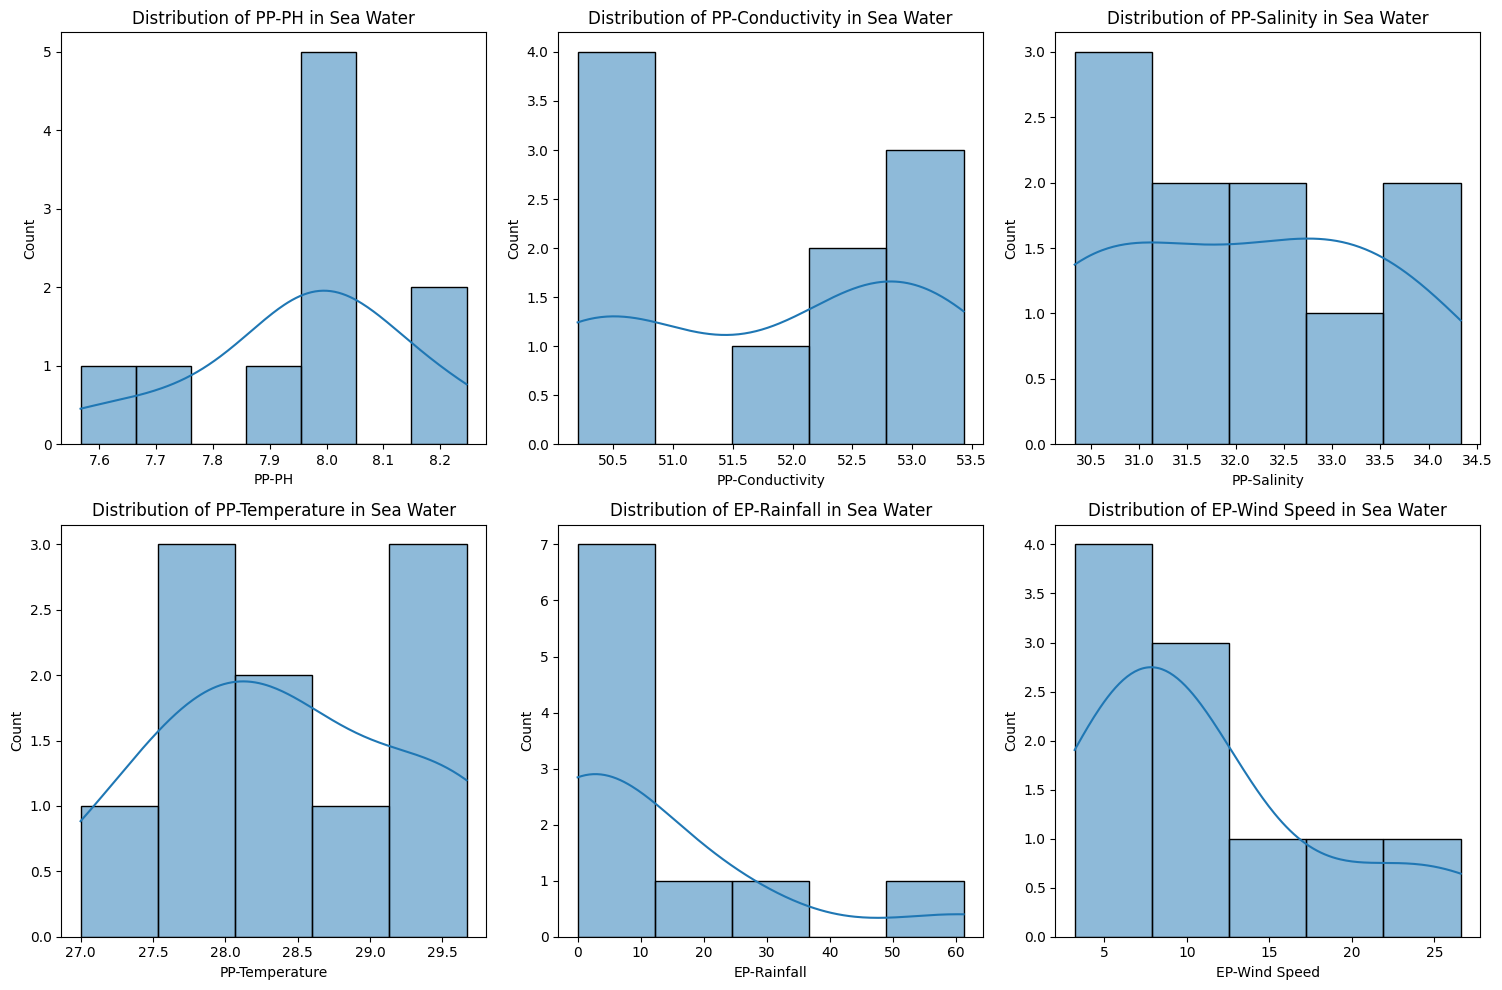

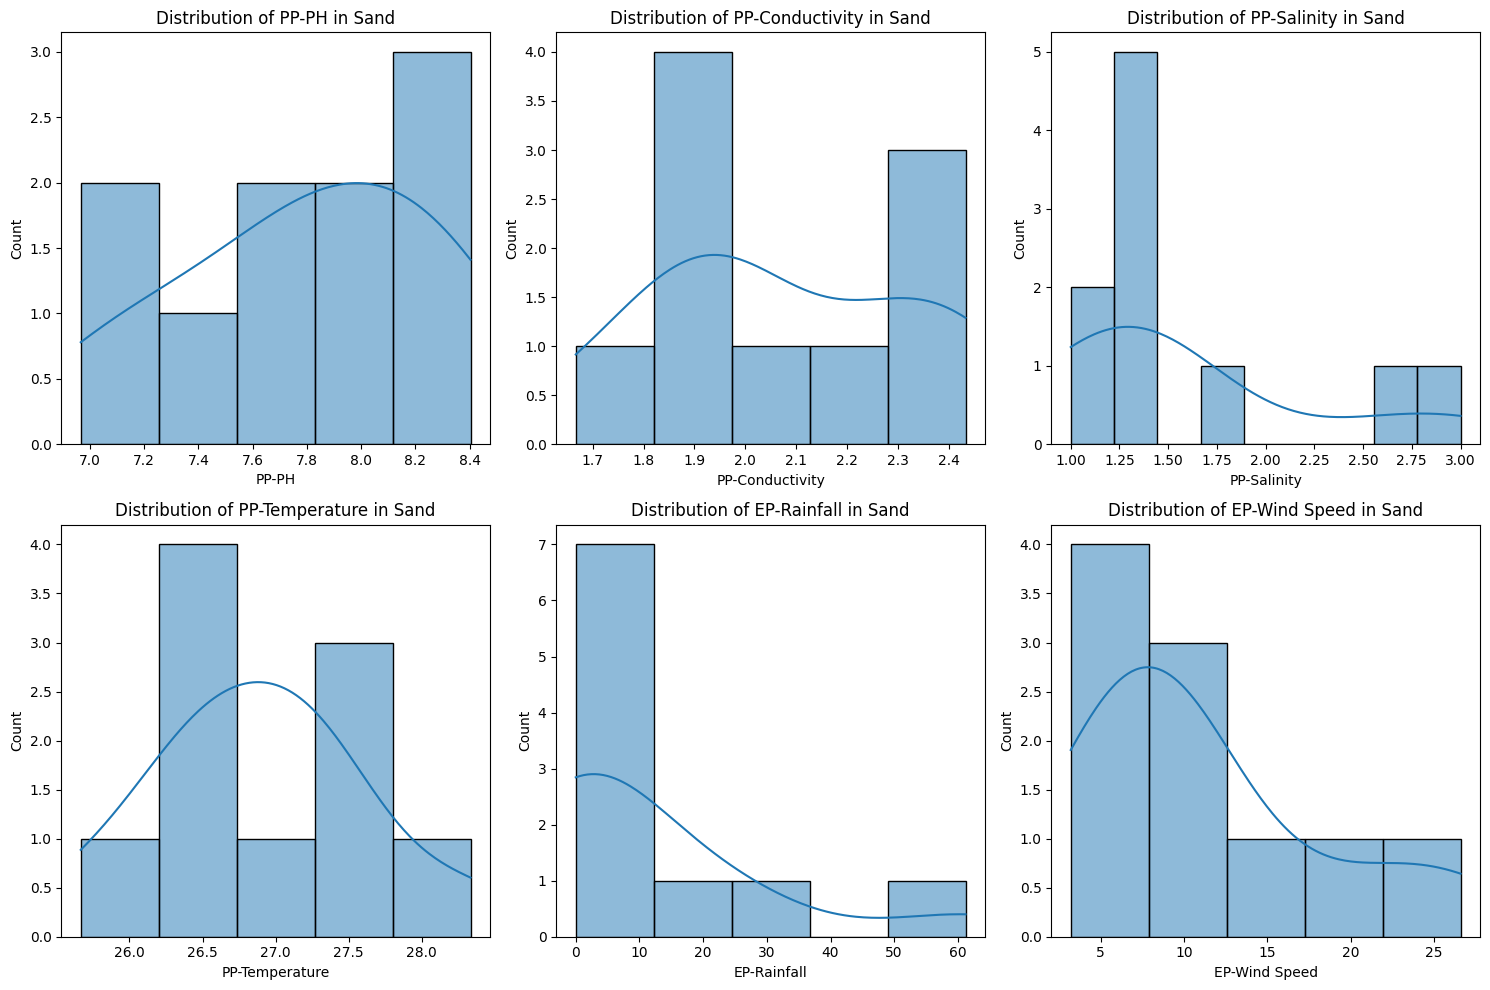

In [3]:
def plot_initial_distributions(df):
    df_seawater = df[df['Area'] == 'Sea Water']
    df_sand = df[df['Area'] == 'Sand']
    # Histograms for bacterial counts
    for bact in bacterial_types:
        plt.figure(figsize=(8, 5))
        sns.histplot(df_seawater[bact], kde=True)
        plt.title(f'Distribution of {bact} in Sea Water')
        plt.xlabel('CFU/100ml')
        plt.show()

    for bact in bacterial_types:
        plt.figure(figsize=(8, 5))
        sns.histplot(df_sand[bact], kde=True)
        plt.title(f'Distribution of {bact} in Sand')
        plt.xlabel('CFU/100ml')
        plt.show()

    # Histograms for physical parameters
    plt.figure(figsize=(15, 10))
    for i, param in enumerate(physical_params, 1):
        plt.subplot(2, 3, i)
        sns.histplot(df_seawater[param], kde=True)
        plt.title(f'Distribution of {param} in Sea Water')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15, 10))
    for i, param in enumerate(physical_params, 1):
        plt.subplot(2, 3, i)
        sns.histplot(df_sand[param], kde=True)
        plt.title(f'Distribution of {param} in Sand')
    plt.tight_layout()
    plt.show()

plot_initial_distributions(weekly_means)

### Assessment of normality and regression type

#####Assess normality of residuals


ANALYSIS FOR: BC-Enterococcus (CFU/100ml) vs PP-PH in Sand (Weekly Means)


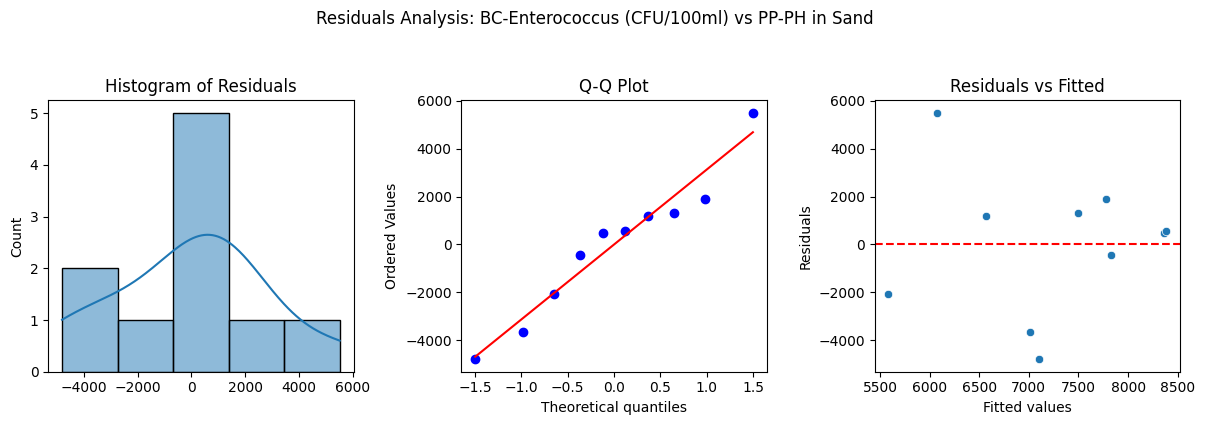


Shapiro-Wilk test for BC-Enterococcus (CFU/100ml) vs PP-PH in Sand:
Test statistic: 0.9570, p-value: 0.7506
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 9.1% of the variance in BC-Enterococcus (CFU/100ml), suggesting little relationship with PP-PH. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                                 OLS Regression Results                                
Dep. Variable:     BC-Enterococcus (CFU/100ml)   R-squared:                       0.091
Model:                                     OLS   Adj. R-squared:                 -0.022
Method:                          Least Squares   F-statistic:                    0.8029
Date:                         Mon, 19 May 2025   Prob (F-statistic):              0.396
Time:                                 09:49:07   Log-Likelihood:                -93.571
No. Observations:                           10   A

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


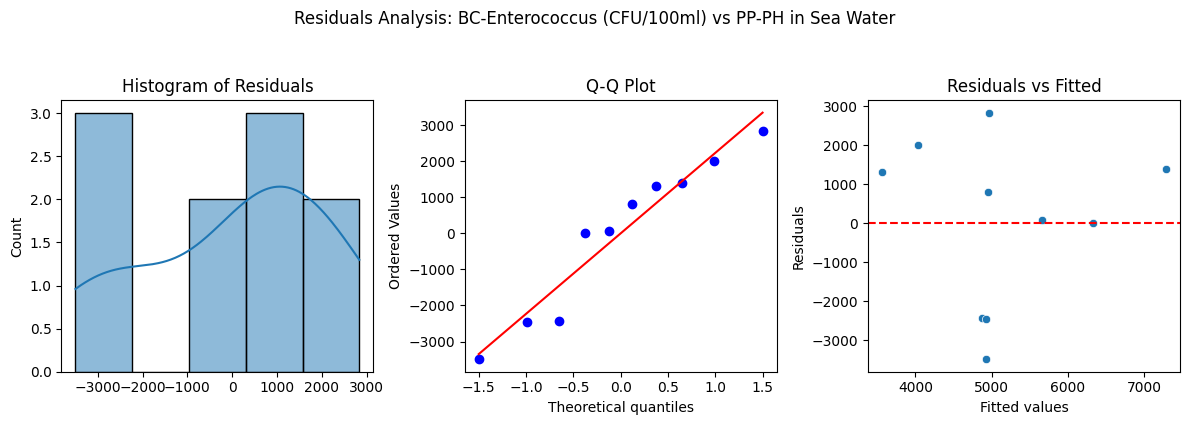


Shapiro-Wilk test for BC-Enterococcus (CFU/100ml) vs PP-PH in Sea Water:
Test statistic: 0.9204, p-value: 0.3605
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 20.1% of the variance in BC-Enterococcus (CFU/100ml), suggesting little relationship with PP-PH.
                                 OLS Regression Results                                
Dep. Variable:     BC-Enterococcus (CFU/100ml)   R-squared:                       0.201
Model:                                     OLS   Adj. R-squared:                  0.101
Method:                          Least Squares   F-statistic:                     2.014
Date:                         Mon, 19 May 2025   Prob (F-statistic):              0.194
Time:                                 09:49:08   Log-Likelihood:                -90.265
No. Observations:                           10   AIC:                             184.5
Df Residuals:                                8   BIC:                       

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


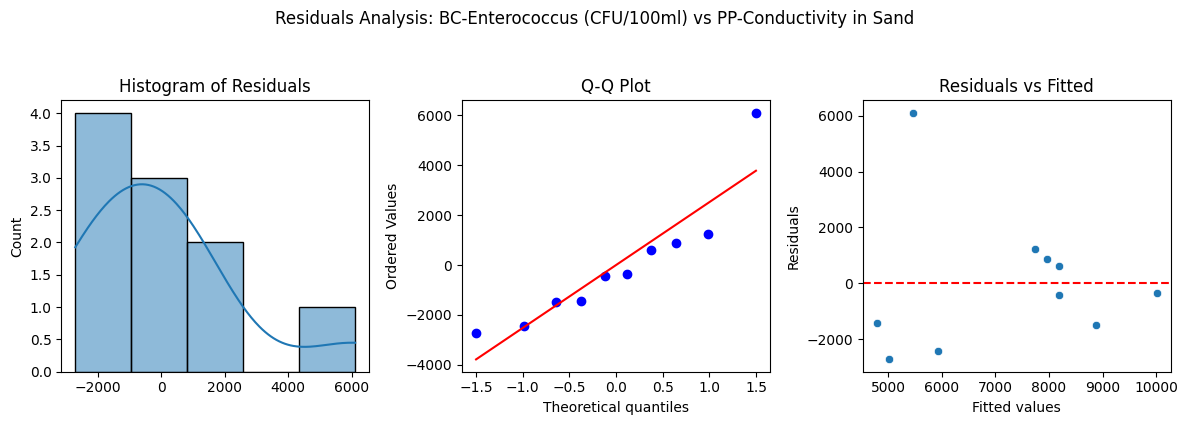


Shapiro-Wilk test for BC-Enterococcus (CFU/100ml) vs PP-Conductivity in Sand:
Test statistic: 0.8541, p-value: 0.0650
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains 33.2% of the variance in BC-Enterococcus (CFU/100ml), indicating a weak but potentially meaningful relationship with PP-Conductivity.
                                 OLS Regression Results                                
Dep. Variable:     BC-Enterococcus (CFU/100ml)   R-squared:                       0.332
Model:                                     OLS   Adj. R-squared:                  0.248
Method:                          Least Squares   F-statistic:                     3.969
Date:                         Mon, 19 May 2025   Prob (F-statistic):             0.0815
Time:                                 09:49:08   Log-Likelihood:                -92.034
No. Observations:                           10   AIC:                             188.1
Df Residuals:                          

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


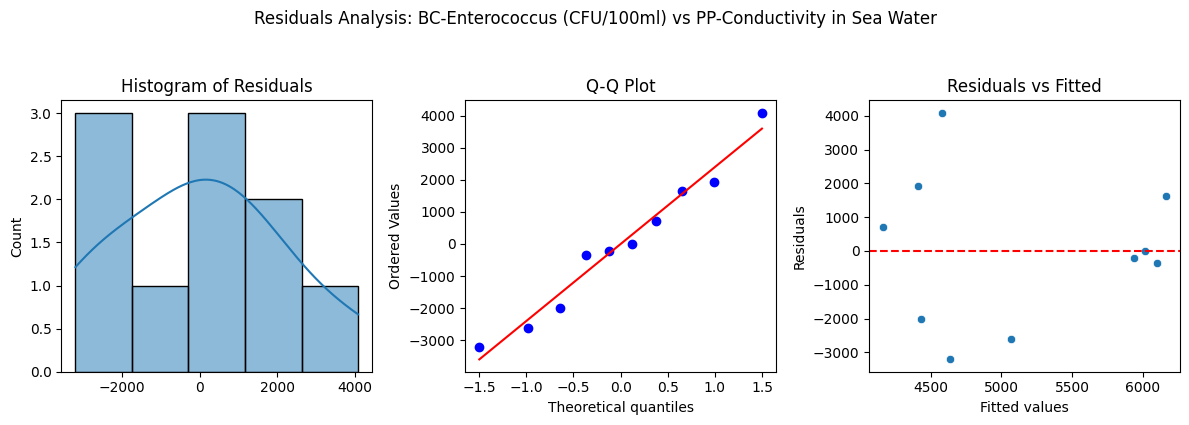


Shapiro-Wilk test for BC-Enterococcus (CFU/100ml) vs PP-Conductivity in Sea Water:
Test statistic: 0.9697, p-value: 0.8877
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 11.7% of the variance in BC-Enterococcus (CFU/100ml), suggesting little relationship with PP-Conductivity. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                                 OLS Regression Results                                
Dep. Variable:     BC-Enterococcus (CFU/100ml)   R-squared:                       0.117
Model:                                     OLS   Adj. R-squared:                  0.007
Method:                          Least Squares   F-statistic:                     1.060
Date:                         Mon, 19 May 2025   Prob (F-statistic):              0.333
Time:                                 09:49:09   Log-Likelihood:                -90.766
No. Observations:       

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


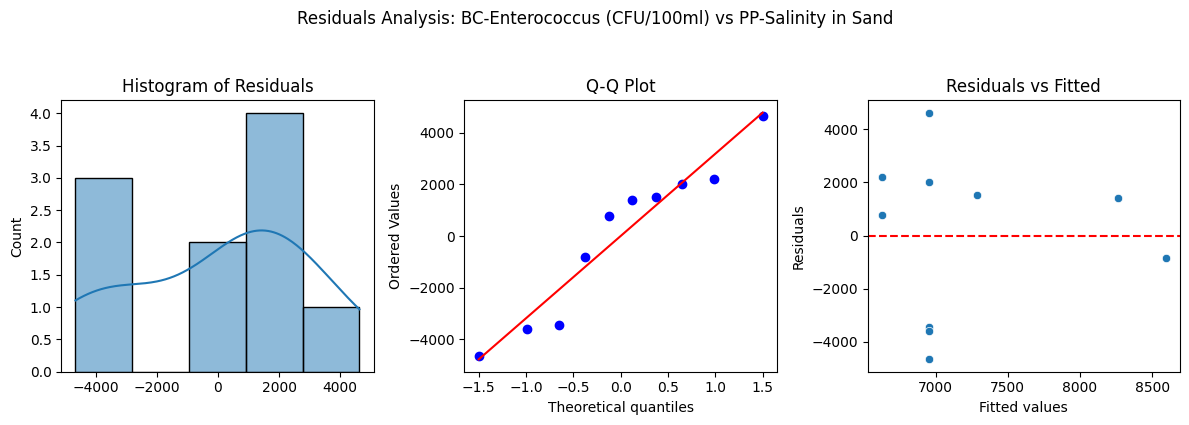


Shapiro-Wilk test for BC-Enterococcus (CFU/100ml) vs PP-Salinity in Sand:
Test statistic: 0.9226, p-value: 0.3789
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 4.7% of the variance in BC-Enterococcus (CFU/100ml), suggesting little relationship with PP-Salinity. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                                 OLS Regression Results                                
Dep. Variable:     BC-Enterococcus (CFU/100ml)   R-squared:                       0.047
Model:                                     OLS   Adj. R-squared:                 -0.072
Method:                          Least Squares   F-statistic:                    0.3921
Date:                         Mon, 19 May 2025   Prob (F-statistic):              0.549
Time:                                 09:49:10   Log-Likelihood:                -93.810
No. Observations:                     

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


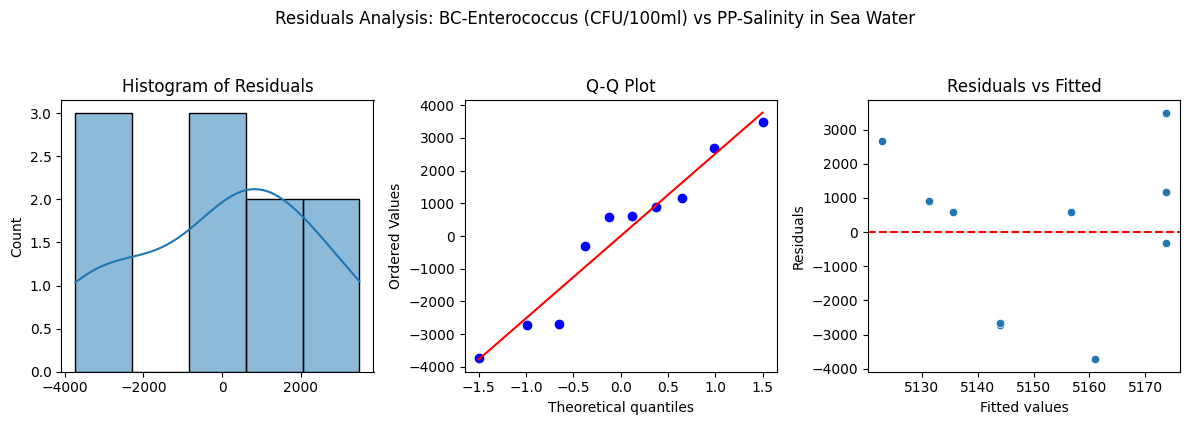


Shapiro-Wilk test for BC-Enterococcus (CFU/100ml) vs PP-Salinity in Sea Water:
Test statistic: 0.9345, p-value: 0.4937
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 0.0% of the variance in BC-Enterococcus (CFU/100ml), suggesting little relationship with PP-Salinity. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                                 OLS Regression Results                                
Dep. Variable:     BC-Enterococcus (CFU/100ml)   R-squared:                       0.000
Model:                                     OLS   Adj. R-squared:                 -0.125
Method:                          Least Squares   F-statistic:                 0.0005038
Date:                         Mon, 19 May 2025   Prob (F-statistic):              0.983
Time:                                 09:49:10   Log-Likelihood:                -91.388
No. Observations:                

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


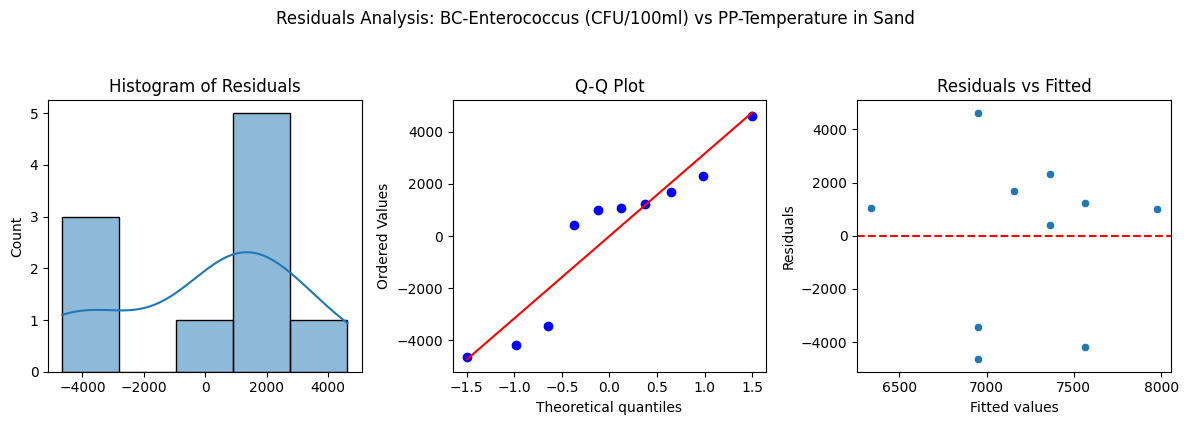


Shapiro-Wilk test for BC-Enterococcus (CFU/100ml) vs PP-Temperature in Sand:
Test statistic: 0.8888, p-value: 0.1644
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 2.1% of the variance in BC-Enterococcus (CFU/100ml), suggesting little relationship with PP-Temperature. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                                 OLS Regression Results                                
Dep. Variable:     BC-Enterococcus (CFU/100ml)   R-squared:                       0.021
Model:                                     OLS   Adj. R-squared:                 -0.101
Method:                          Least Squares   F-statistic:                    0.1736
Date:                         Mon, 19 May 2025   Prob (F-statistic):              0.688
Time:                                 09:49:11   Log-Likelihood:                -93.942
No. Observations:               

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


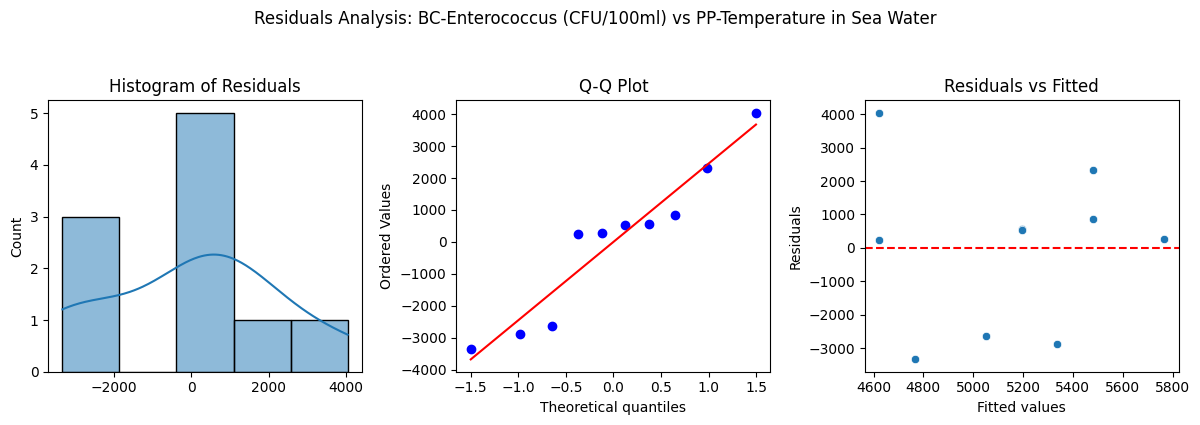


Shapiro-Wilk test for BC-Enterococcus (CFU/100ml) vs PP-Temperature in Sea Water:
Test statistic: 0.9177, p-value: 0.3380
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 2.7% of the variance in BC-Enterococcus (CFU/100ml), suggesting little relationship with PP-Temperature. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                                 OLS Regression Results                                
Dep. Variable:     BC-Enterococcus (CFU/100ml)   R-squared:                       0.027
Model:                                     OLS   Adj. R-squared:                 -0.095
Method:                          Least Squares   F-statistic:                    0.2191
Date:                         Mon, 19 May 2025   Prob (F-statistic):              0.652
Time:                                 09:49:11   Log-Likelihood:                -91.253
No. Observations:          

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


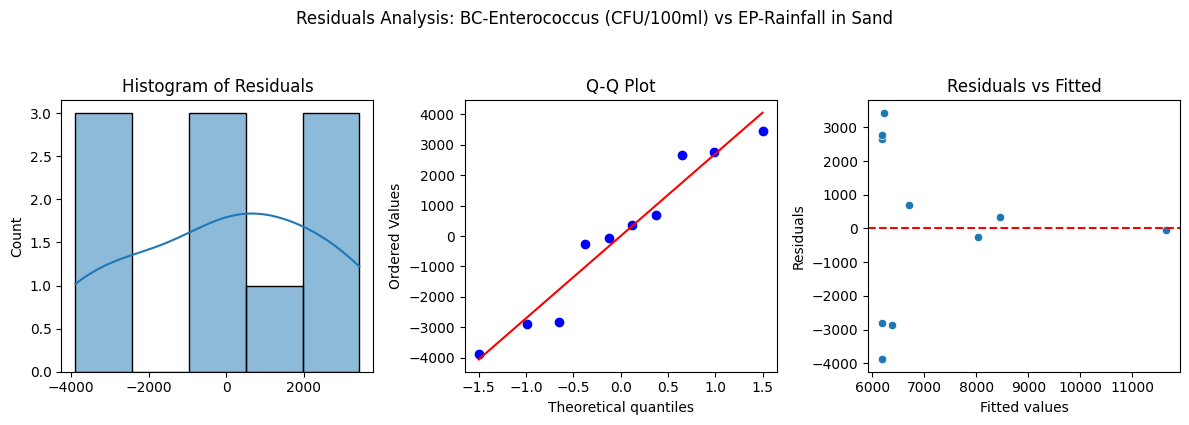


Shapiro-Wilk test for BC-Enterococcus (CFU/100ml) vs EP-Rainfall in Sand:
Test statistic: 0.9270, p-value: 0.4188
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains 32.3% of the variance in BC-Enterococcus (CFU/100ml), indicating a weak but potentially meaningful relationship with EP-Rainfall.
                                 OLS Regression Results                                
Dep. Variable:     BC-Enterococcus (CFU/100ml)   R-squared:                       0.323
Model:                                     OLS   Adj. R-squared:                  0.239
Method:                          Least Squares   F-statistic:                     3.822
Date:                         Mon, 19 May 2025   Prob (F-statistic):             0.0863
Time:                                 09:49:12   Log-Likelihood:                -92.096
No. Observations:                           10   AIC:                             188.2
Df Residuals:                                8 

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


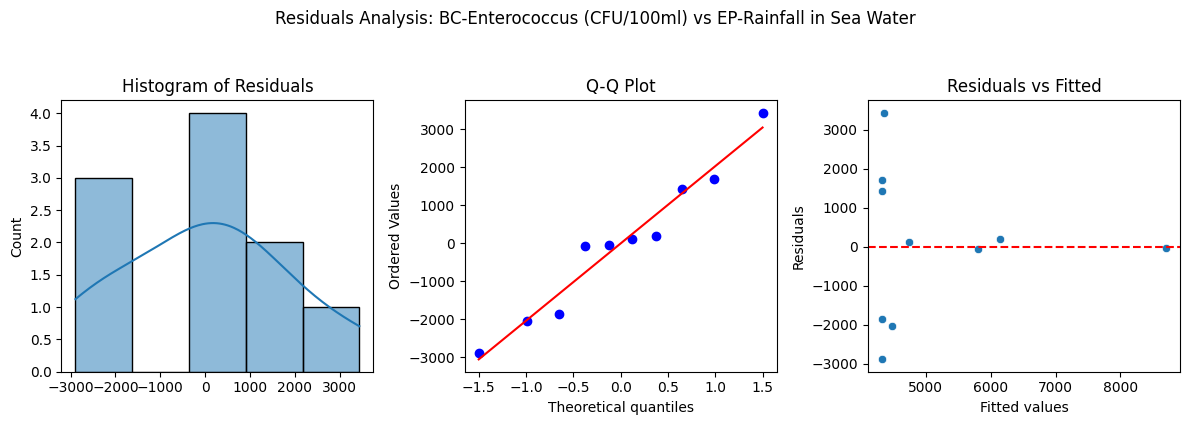


Shapiro-Wilk test for BC-Enterococcus (CFU/100ml) vs EP-Rainfall in Sea Water:
Test statistic: 0.9580, p-value: 0.7623
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains 35.4% of the variance in BC-Enterococcus (CFU/100ml), indicating a weak but potentially meaningful relationship with EP-Rainfall.
                                 OLS Regression Results                                
Dep. Variable:     BC-Enterococcus (CFU/100ml)   R-squared:                       0.354
Model:                                     OLS   Adj. R-squared:                  0.273
Method:                          Least Squares   F-statistic:                     4.379
Date:                         Mon, 19 May 2025   Prob (F-statistic):             0.0697
Time:                                 09:49:12   Log-Likelihood:                -89.205
No. Observations:                           10   AIC:                             182.4
Df Residuals:                             

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


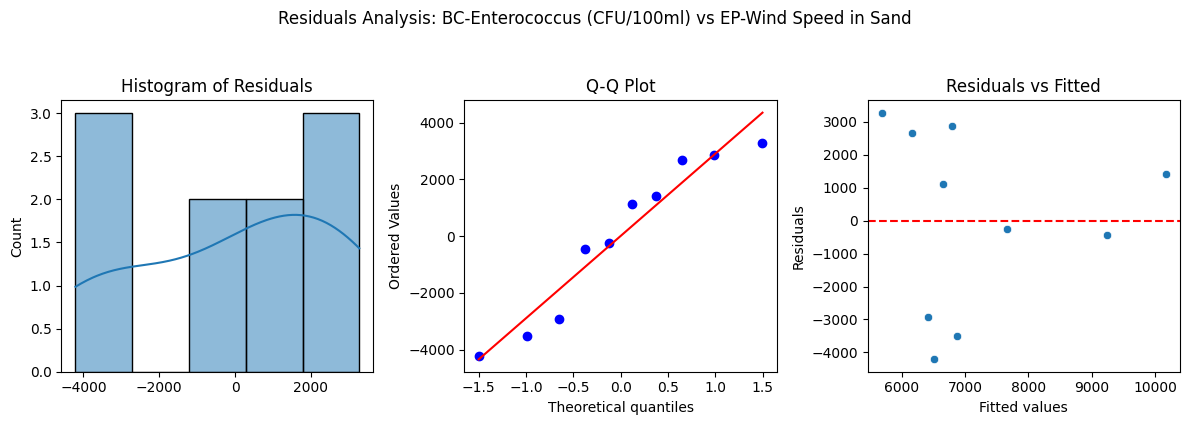


Shapiro-Wilk test for BC-Enterococcus (CFU/100ml) vs EP-Wind Speed in Sand:
Test statistic: 0.9100, p-value: 0.2810
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 21.1% of the variance in BC-Enterococcus (CFU/100ml), suggesting little relationship with EP-Wind Speed.
                                 OLS Regression Results                                
Dep. Variable:     BC-Enterococcus (CFU/100ml)   R-squared:                       0.211
Model:                                     OLS   Adj. R-squared:                  0.112
Method:                          Least Squares   F-statistic:                     2.141
Date:                         Mon, 19 May 2025   Prob (F-statistic):              0.182
Time:                                 09:49:13   Log-Likelihood:                -92.863
No. Observations:                           10   AIC:                             189.7
Df Residuals:                                8   BIC:            

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


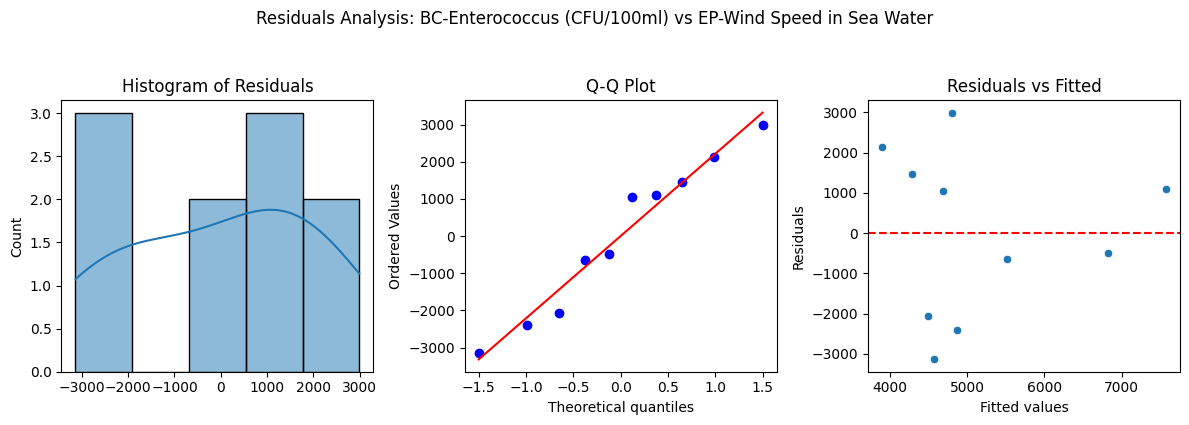


Shapiro-Wilk test for BC-Enterococcus (CFU/100ml) vs EP-Wind Speed in Sea Water:
Test statistic: 0.9484, p-value: 0.6491
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 24.2% of the variance in BC-Enterococcus (CFU/100ml), suggesting little relationship with EP-Wind Speed.
                                 OLS Regression Results                                
Dep. Variable:     BC-Enterococcus (CFU/100ml)   R-squared:                       0.242
Model:                                     OLS   Adj. R-squared:                  0.147
Method:                          Least Squares   F-statistic:                     2.548
Date:                         Mon, 19 May 2025   Prob (F-statistic):              0.149
Time:                                 09:49:13   Log-Likelihood:                -90.005
No. Observations:                           10   AIC:                             184.0
Df Residuals:                                8   BIC:       

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


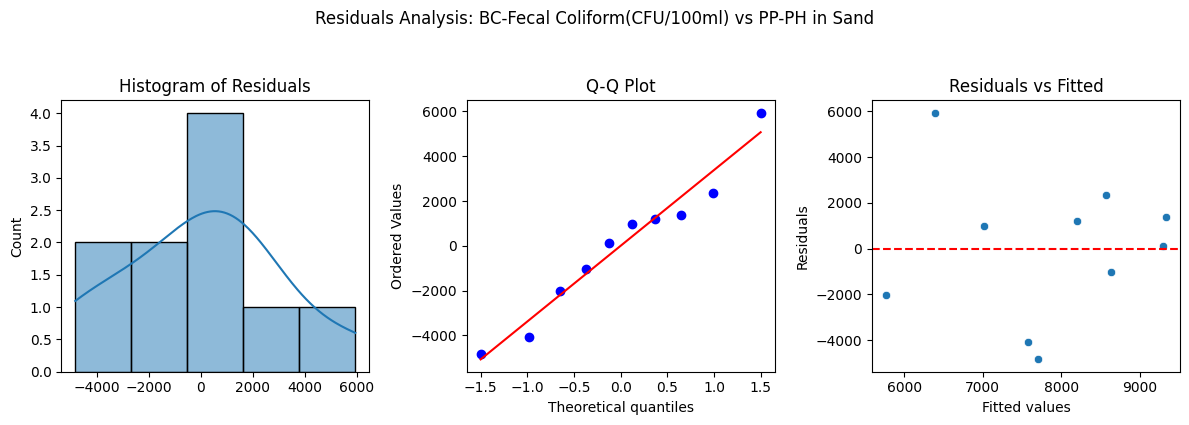


Shapiro-Wilk test for BC-Fecal Coliform(CFU/100ml) vs PP-PH in Sand:
Test statistic: 0.9651, p-value: 0.8417
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 12.4% of the variance in BC-Fecal Coliform(CFU/100ml), suggesting little relationship with PP-PH. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                                 OLS Regression Results                                 
Dep. Variable:     BC-Fecal Coliform(CFU/100ml)   R-squared:                       0.124
Model:                                      OLS   Adj. R-squared:                  0.015
Method:                           Least Squares   F-statistic:                     1.134
Date:                          Mon, 19 May 2025   Prob (F-statistic):              0.318
Time:                                  09:49:14   Log-Likelihood:                -94.276
No. Observations:                        

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


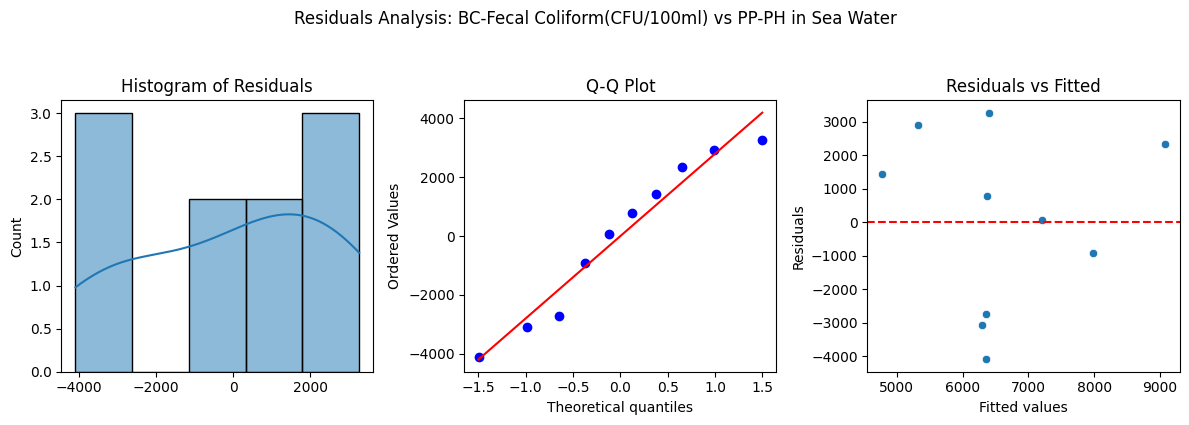


Shapiro-Wilk test for BC-Fecal Coliform(CFU/100ml) vs PP-PH in Sea Water:
Test statistic: 0.9339, p-value: 0.4874
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 18.2% of the variance in BC-Fecal Coliform(CFU/100ml), suggesting little relationship with PP-PH. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                                 OLS Regression Results                                 
Dep. Variable:     BC-Fecal Coliform(CFU/100ml)   R-squared:                       0.182
Model:                                      OLS   Adj. R-squared:                  0.080
Method:                           Least Squares   F-statistic:                     1.778
Date:                          Mon, 19 May 2025   Prob (F-statistic):              0.219
Time:                                  09:49:15   Log-Likelihood:                -92.367
No. Observations:                   

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


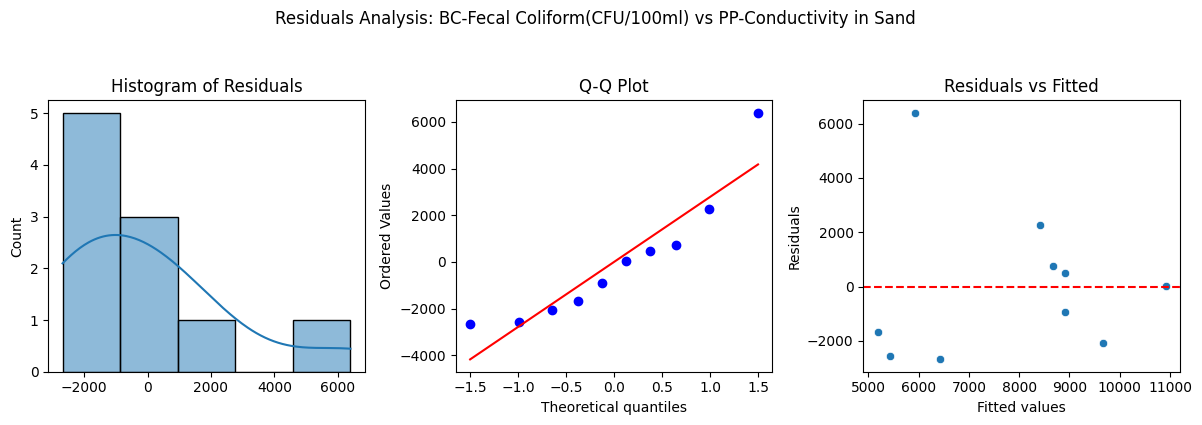


Shapiro-Wilk test for BC-Fecal Coliform(CFU/100ml) vs PP-Conductivity in Sand:
Test statistic: 0.8657, p-value: 0.0892
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains 33.5% of the variance in BC-Fecal Coliform(CFU/100ml), indicating a weak but potentially meaningful relationship with PP-Conductivity.
                                 OLS Regression Results                                 
Dep. Variable:     BC-Fecal Coliform(CFU/100ml)   R-squared:                       0.335
Model:                                      OLS   Adj. R-squared:                  0.252
Method:                           Least Squares   F-statistic:                     4.025
Date:                          Mon, 19 May 2025   Prob (F-statistic):             0.0798
Time:                                  09:49:16   Log-Likelihood:                -92.902
No. Observations:                            10   AIC:                             189.8
Df Residuals:                 

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


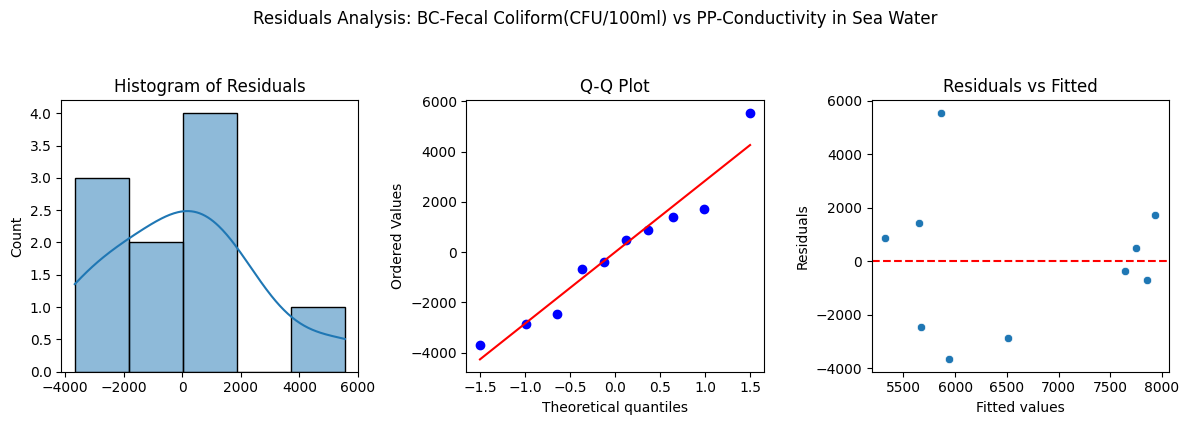


Shapiro-Wilk test for BC-Fecal Coliform(CFU/100ml) vs PP-Conductivity in Sea Water:
Test statistic: 0.9482, p-value: 0.6469
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 13.4% of the variance in BC-Fecal Coliform(CFU/100ml), suggesting little relationship with PP-Conductivity. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                                 OLS Regression Results                                 
Dep. Variable:     BC-Fecal Coliform(CFU/100ml)   R-squared:                       0.134
Model:                                      OLS   Adj. R-squared:                  0.026
Method:                           Least Squares   F-statistic:                     1.242
Date:                          Mon, 19 May 2025   Prob (F-statistic):              0.297
Time:                                  09:49:16   Log-Likelihood:                -92.649
No. Observations

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


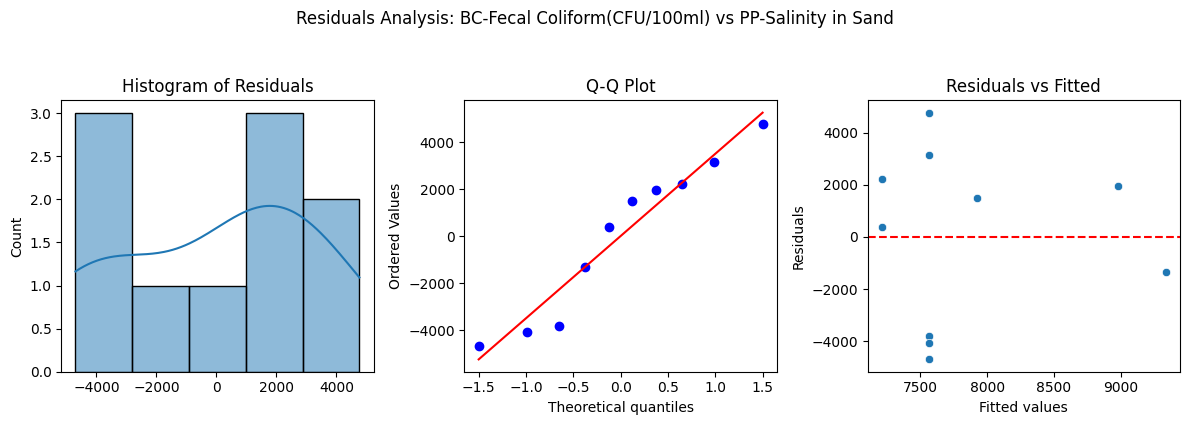


Shapiro-Wilk test for BC-Fecal Coliform(CFU/100ml) vs PP-Salinity in Sand:
Test statistic: 0.9233, p-value: 0.3856
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 4.6% of the variance in BC-Fecal Coliform(CFU/100ml), suggesting little relationship with PP-Salinity. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                                 OLS Regression Results                                 
Dep. Variable:     BC-Fecal Coliform(CFU/100ml)   R-squared:                       0.046
Model:                                      OLS   Adj. R-squared:                 -0.074
Method:                           Least Squares   F-statistic:                    0.3830
Date:                          Mon, 19 May 2025   Prob (F-statistic):              0.553
Time:                                  09:49:17   Log-Likelihood:                -94.705
No. Observations:             

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


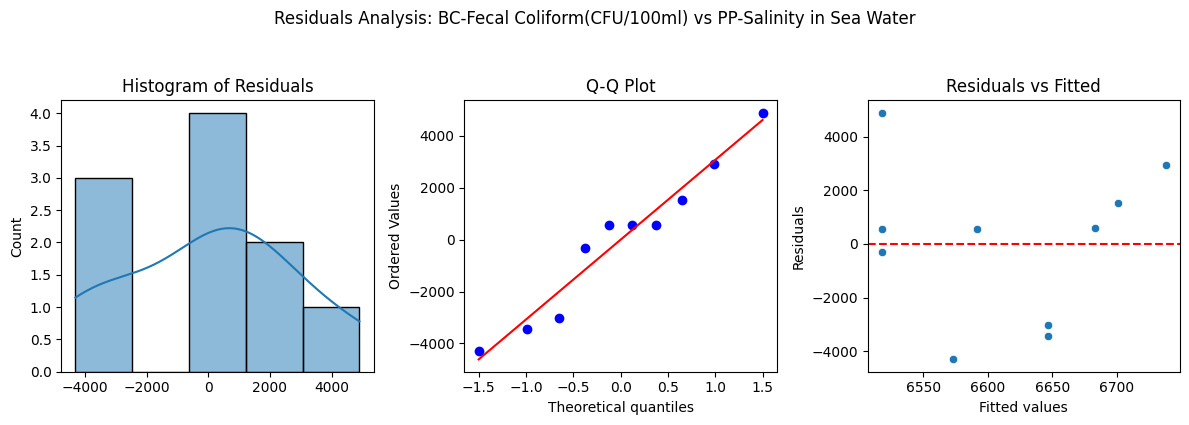


Shapiro-Wilk test for BC-Fecal Coliform(CFU/100ml) vs PP-Salinity in Sea Water:
Test statistic: 0.9492, p-value: 0.6590
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 0.1% of the variance in BC-Fecal Coliform(CFU/100ml), suggesting little relationship with PP-Salinity. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                                 OLS Regression Results                                 
Dep. Variable:     BC-Fecal Coliform(CFU/100ml)   R-squared:                       0.001
Model:                                      OLS   Adj. R-squared:                 -0.124
Method:                           Least Squares   F-statistic:                  0.006338
Date:                          Mon, 19 May 2025   Prob (F-statistic):              0.939
Time:                                  09:49:17   Log-Likelihood:                -93.367
No. Observations:        

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


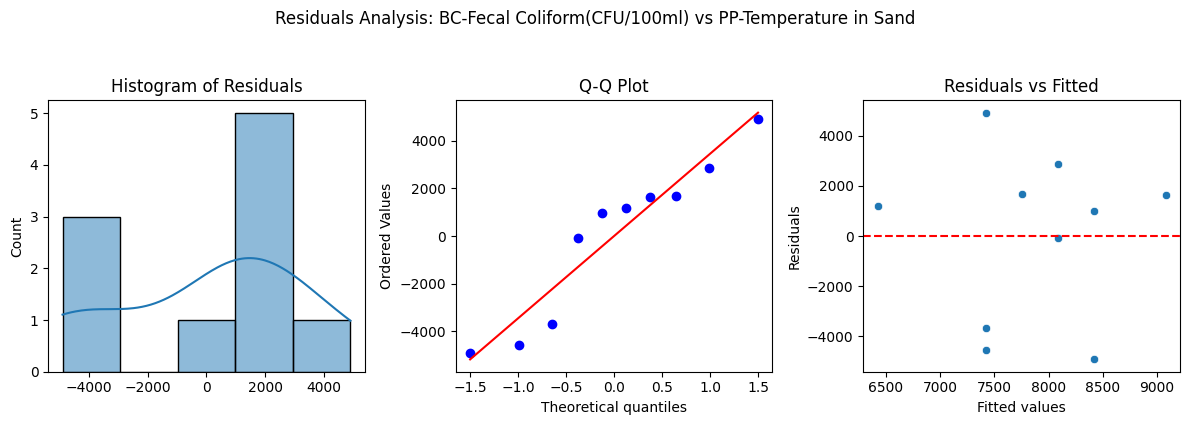


Shapiro-Wilk test for BC-Fecal Coliform(CFU/100ml) vs PP-Temperature in Sand:
Test statistic: 0.9048, p-value: 0.2471
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 4.7% of the variance in BC-Fecal Coliform(CFU/100ml), suggesting little relationship with PP-Temperature. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                                 OLS Regression Results                                 
Dep. Variable:     BC-Fecal Coliform(CFU/100ml)   R-squared:                       0.047
Model:                                      OLS   Adj. R-squared:                 -0.072
Method:                           Least Squares   F-statistic:                    0.3948
Date:                          Mon, 19 May 2025   Prob (F-statistic):              0.547
Time:                                  09:49:18   Log-Likelihood:                -94.698
No. Observations:       

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


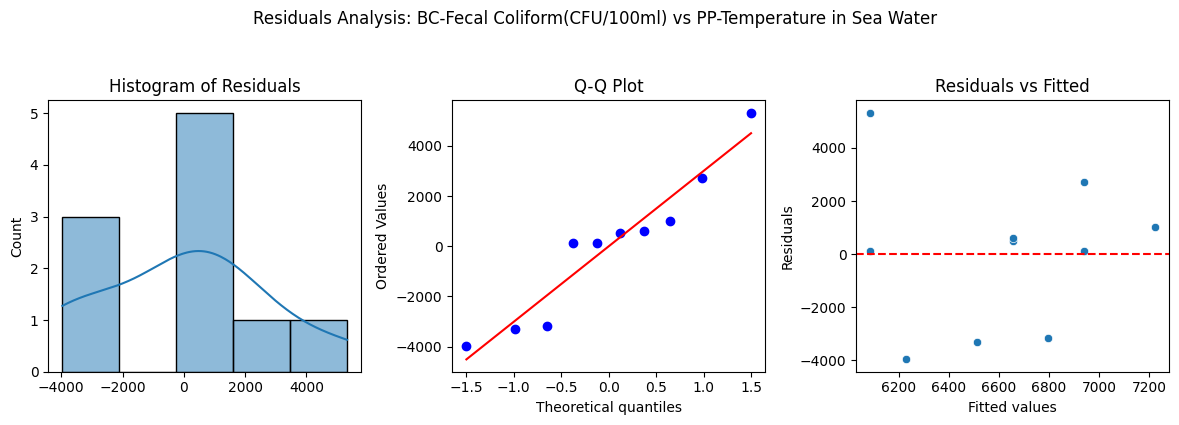


Shapiro-Wilk test for BC-Fecal Coliform(CFU/100ml) vs PP-Temperature in Sea Water:
Test statistic: 0.9260, p-value: 0.4098
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 1.8% of the variance in BC-Fecal Coliform(CFU/100ml), suggesting little relationship with PP-Temperature. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                                 OLS Regression Results                                 
Dep. Variable:     BC-Fecal Coliform(CFU/100ml)   R-squared:                       0.018
Model:                                      OLS   Adj. R-squared:                 -0.105
Method:                           Least Squares   F-statistic:                    0.1440
Date:                          Mon, 19 May 2025   Prob (F-statistic):              0.714
Time:                                  09:49:18   Log-Likelihood:                -93.281
No. Observations:  

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


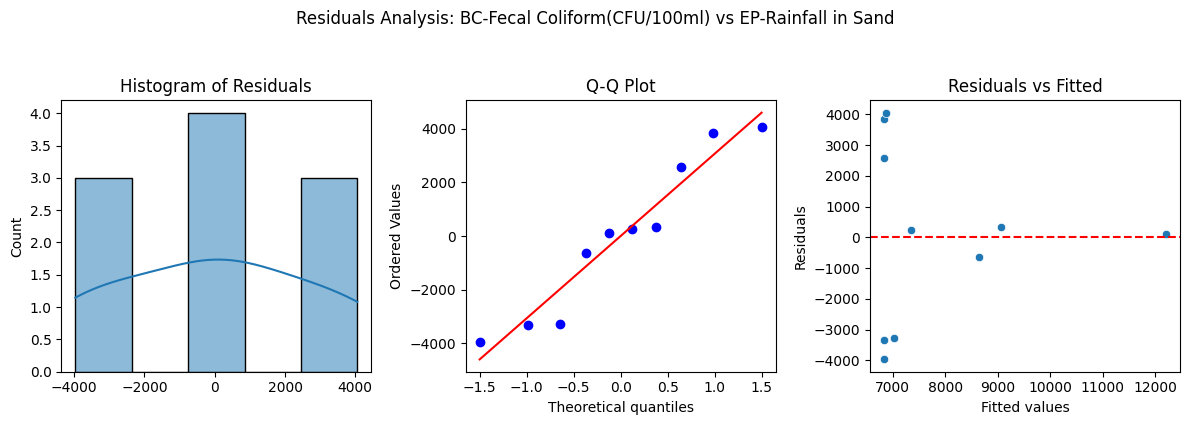


Shapiro-Wilk test for BC-Fecal Coliform(CFU/100ml) vs EP-Rainfall in Sand:
Test statistic: 0.9153, p-value: 0.3192
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 26.3% of the variance in BC-Fecal Coliform(CFU/100ml), suggesting little relationship with EP-Rainfall.
                                 OLS Regression Results                                 
Dep. Variable:     BC-Fecal Coliform(CFU/100ml)   R-squared:                       0.263
Model:                                      OLS   Adj. R-squared:                  0.170
Method:                           Least Squares   F-statistic:                     2.848
Date:                          Mon, 19 May 2025   Prob (F-statistic):              0.130
Time:                                  09:49:19   Log-Likelihood:                -93.417
No. Observations:                            10   AIC:                             190.8
Df Residuals:                                 8   BIC:      

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


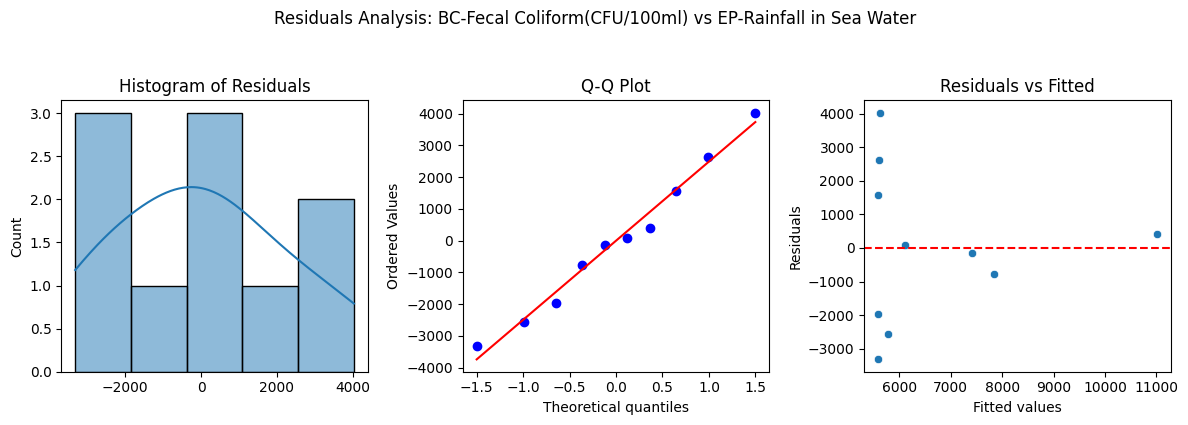


Shapiro-Wilk test for BC-Fecal Coliform(CFU/100ml) vs EP-Rainfall in Sea Water:
Test statistic: 0.9768, p-value: 0.9459
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains 36.5% of the variance in BC-Fecal Coliform(CFU/100ml), indicating a weak but potentially meaningful relationship with EP-Rainfall.
                                 OLS Regression Results                                 
Dep. Variable:     BC-Fecal Coliform(CFU/100ml)   R-squared:                       0.365
Model:                                      OLS   Adj. R-squared:                  0.286
Method:                           Least Squares   F-statistic:                     4.599
Date:                          Mon, 19 May 2025   Prob (F-statistic):             0.0643
Time:                                  09:49:20   Log-Likelihood:                -91.100
No. Observations:                            10   AIC:                             186.2
Df Residuals:                    

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


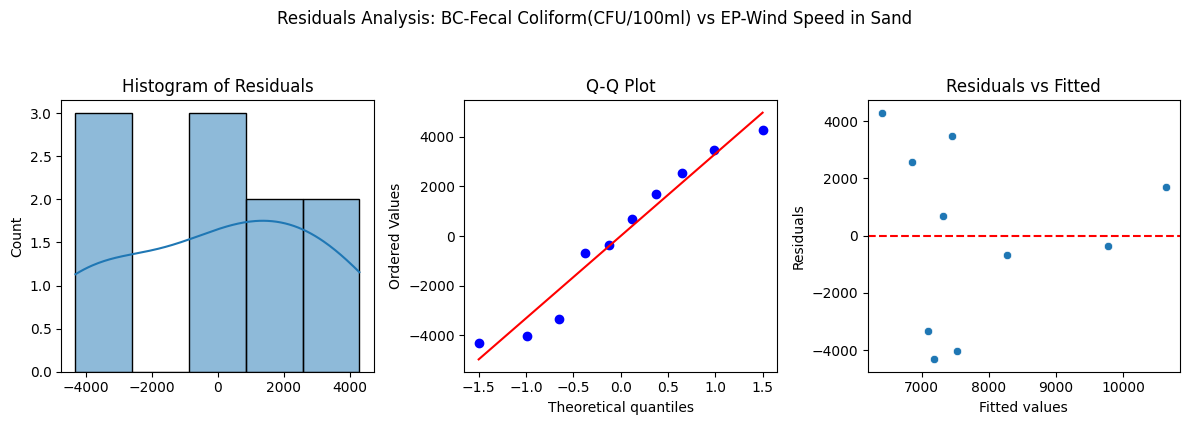


Shapiro-Wilk test for BC-Fecal Coliform(CFU/100ml) vs EP-Wind Speed in Sand:
Test statistic: 0.9318, p-value: 0.4659
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 15.7% of the variance in BC-Fecal Coliform(CFU/100ml), suggesting little relationship with EP-Wind Speed. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                                 OLS Regression Results                                 
Dep. Variable:     BC-Fecal Coliform(CFU/100ml)   R-squared:                       0.157
Model:                                      OLS   Adj. R-squared:                  0.051
Method:                           Least Squares   F-statistic:                     1.488
Date:                          Mon, 19 May 2025   Prob (F-statistic):              0.257
Time:                                  09:49:20   Log-Likelihood:                -94.086
No. Observations:        

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


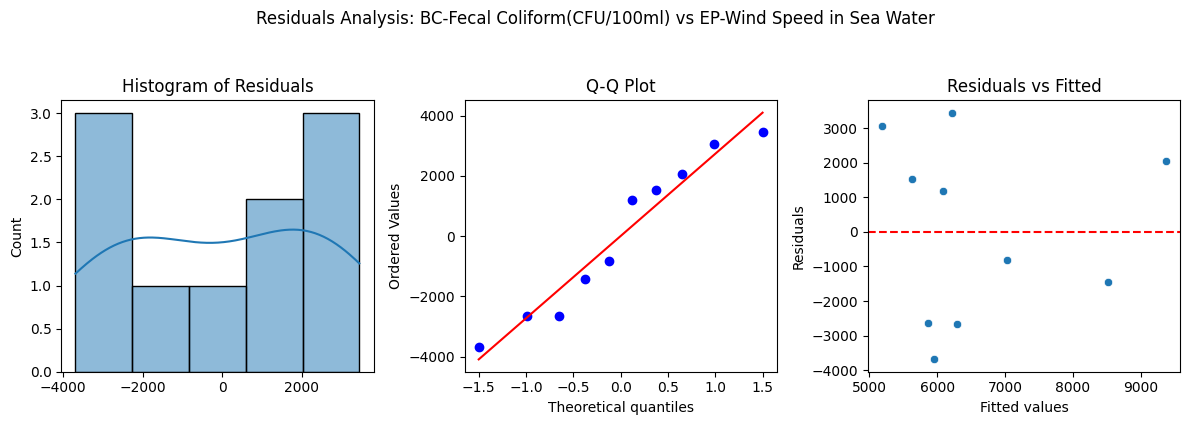


Shapiro-Wilk test for BC-Fecal Coliform(CFU/100ml) vs EP-Wind Speed in Sea Water:
Test statistic: 0.9249, p-value: 0.3999
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 21.0% of the variance in BC-Fecal Coliform(CFU/100ml), suggesting little relationship with EP-Wind Speed.
                                 OLS Regression Results                                 
Dep. Variable:     BC-Fecal Coliform(CFU/100ml)   R-squared:                       0.210
Model:                                      OLS   Adj. R-squared:                  0.112
Method:                           Least Squares   F-statistic:                     2.132
Date:                          Mon, 19 May 2025   Prob (F-statistic):              0.182
Time:                                  09:49:21   Log-Likelihood:                -92.190
No. Observations:                            10   AIC:                             188.4
Df Residuals:                                 8   B

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


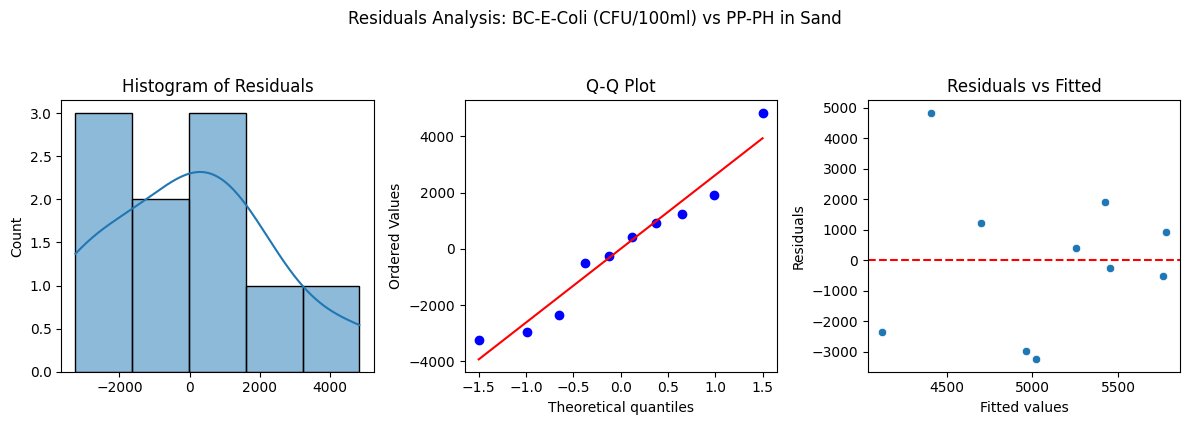


Shapiro-Wilk test for BC-E-Coli (CFU/100ml) vs PP-PH in Sand:
Test statistic: 0.9503, p-value: 0.6723
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 4.8% of the variance in BC-E-Coli (CFU/100ml), suggesting little relationship with PP-PH. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                              OLS Regression Results                             
Dep. Variable:     BC-E-Coli (CFU/100ml)   R-squared:                       0.048
Model:                               OLS   Adj. R-squared:                 -0.071
Method:                    Least Squares   F-statistic:                    0.4015
Date:                   Mon, 19 May 2025   Prob (F-statistic):              0.544
Time:                           09:49:21   Log-Likelihood:                -91.771
No. Observations:                     10   AIC:                             187.5
Df Residuals:   

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


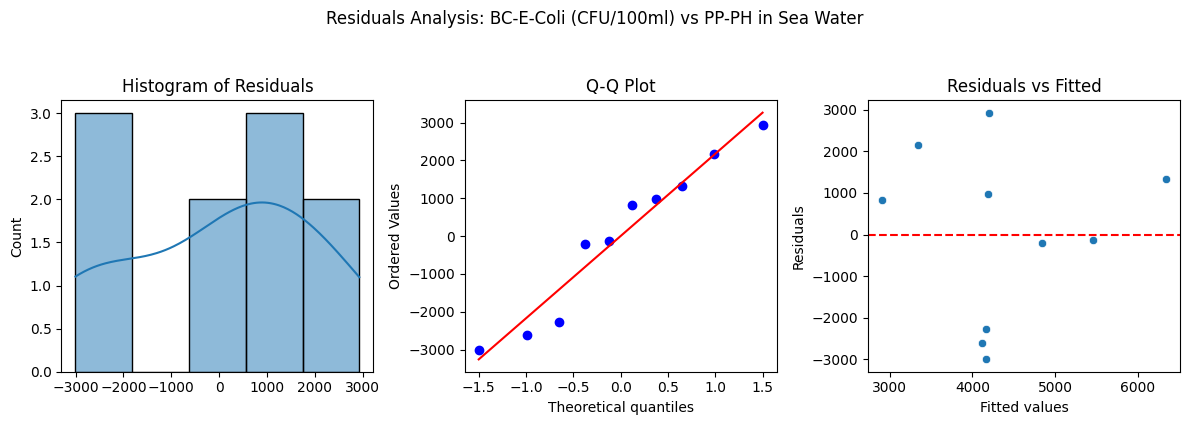


Shapiro-Wilk test for BC-E-Coli (CFU/100ml) vs PP-PH in Sea Water:
Test statistic: 0.9321, p-value: 0.4691
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 18.7% of the variance in BC-E-Coli (CFU/100ml), suggesting little relationship with PP-PH. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                              OLS Regression Results                             
Dep. Variable:     BC-E-Coli (CFU/100ml)   R-squared:                       0.187
Model:                               OLS   Adj. R-squared:                  0.086
Method:                    Least Squares   F-statistic:                     1.844
Date:                   Mon, 19 May 2025   Prob (F-statistic):              0.211
Time:                           09:49:22   Log-Likelihood:                -89.905
No. Observations:                     10   AIC:                             183.8
Df Residua

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


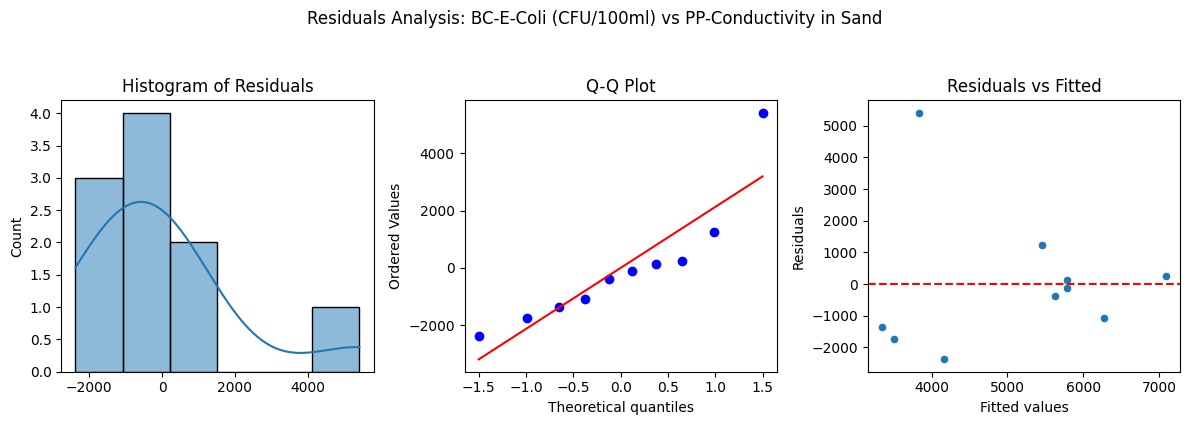


Shapiro-Wilk test for BC-E-Coli (CFU/100ml) vs PP-Conductivity in Sand:
Test statistic: 0.8286, p-value: 0.0322
Residuals not normal (p ≤ 0.05). Type: Poisson regression.
['Model explains 23.6% of variance (pseudo R²), indicating a meaningful relationship.', 'Baseline rate (intercept): 37878.14 CFU/100ml', 'For each unit increase in PP-Conductivity, bacterial counts decrease by 62.5% (IRR = 0.375, p = 0.000) - statistically significant']
                   Generalized Linear Model Regression Results                   
Dep. Variable:     BC-E-Coli (CFU/100ml)   No. Observations:                   10
Model:                               GLM   Df Residuals:                        8
Model Family:                    Poisson   Df Model:                            1
Link Function:                       Log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -4824.4
Date:                   Mon, 19 May 2025   Deviance:             

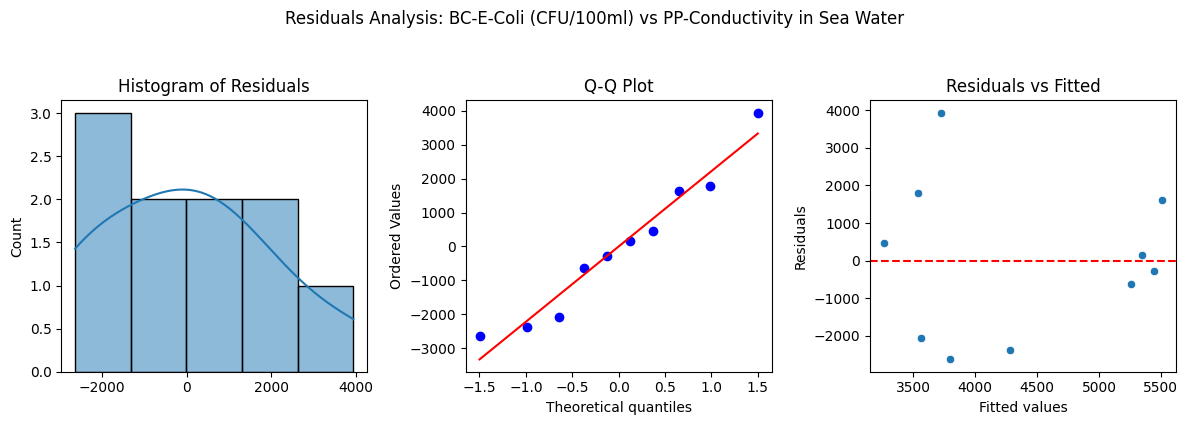


Shapiro-Wilk test for BC-E-Coli (CFU/100ml) vs PP-Conductivity in Sea Water:
Test statistic: 0.9508, p-value: 0.6780
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 16.1% of the variance in BC-E-Coli (CFU/100ml), suggesting little relationship with PP-Conductivity. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                              OLS Regression Results                             
Dep. Variable:     BC-E-Coli (CFU/100ml)   R-squared:                       0.161
Model:                               OLS   Adj. R-squared:                  0.057
Method:                    Least Squares   F-statistic:                     1.539
Date:                   Mon, 19 May 2025   Prob (F-statistic):              0.250
Time:                           09:49:23   Log-Likelihood:                -90.063
No. Observations:                     10   AIC:                         

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


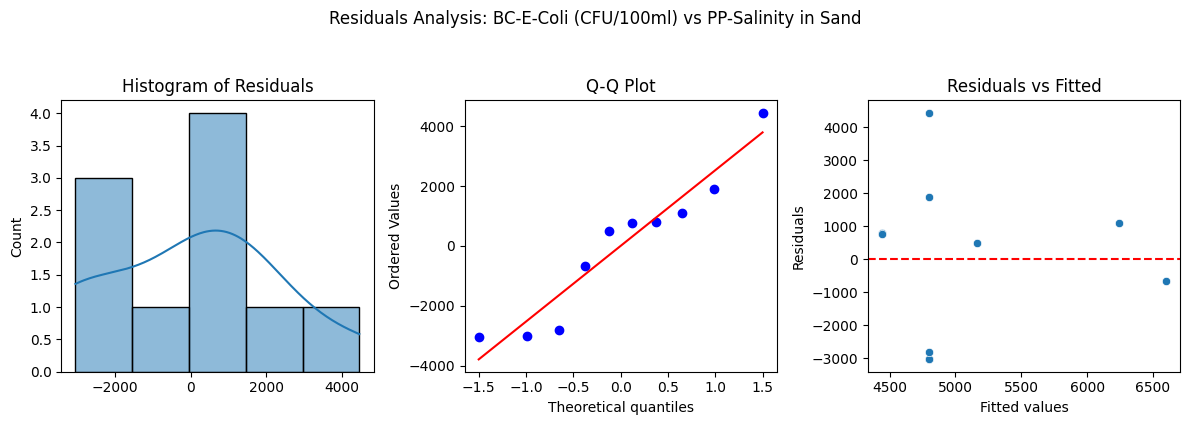


Shapiro-Wilk test for BC-E-Coli (CFU/100ml) vs PP-Salinity in Sand:
Test statistic: 0.9133, p-value: 0.3048
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 8.4% of the variance in BC-E-Coli (CFU/100ml), suggesting little relationship with PP-Salinity. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                              OLS Regression Results                             
Dep. Variable:     BC-E-Coli (CFU/100ml)   R-squared:                       0.084
Model:                               OLS   Adj. R-squared:                 -0.030
Method:                    Least Squares   F-statistic:                    0.7371
Date:                   Mon, 19 May 2025   Prob (F-statistic):              0.416
Time:                           09:49:24   Log-Likelihood:                -91.576
No. Observations:                     10   AIC:                             187.2
Df R

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


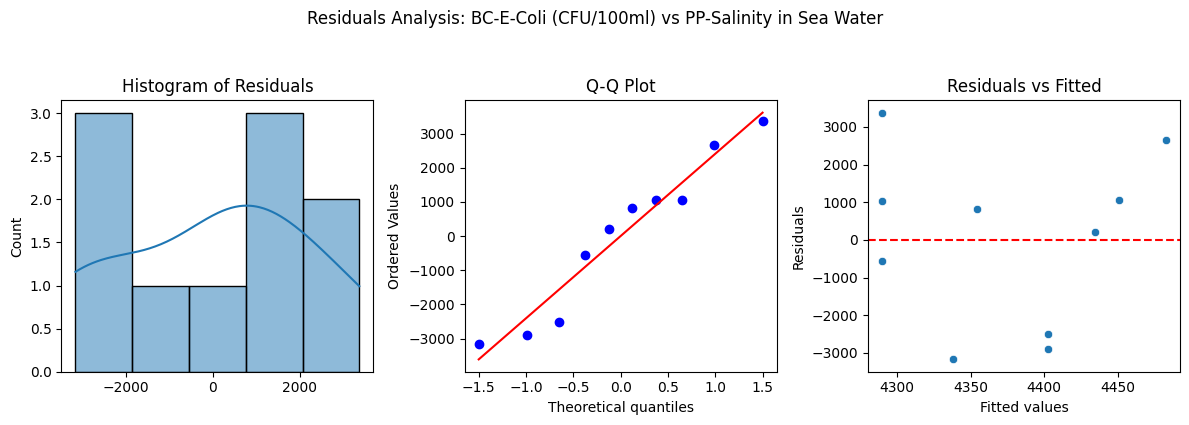


Shapiro-Wilk test for BC-E-Coli (CFU/100ml) vs PP-Salinity in Sea Water:
Test statistic: 0.9297, p-value: 0.4450
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 0.1% of the variance in BC-E-Coli (CFU/100ml), suggesting little relationship with PP-Salinity. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                              OLS Regression Results                             
Dep. Variable:     BC-E-Coli (CFU/100ml)   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                 -0.124
Method:                    Least Squares   F-statistic:                  0.007909
Date:                   Mon, 19 May 2025   Prob (F-statistic):              0.931
Time:                           09:49:24   Log-Likelihood:                -90.937
No. Observations:                     10   AIC:                             185.9

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


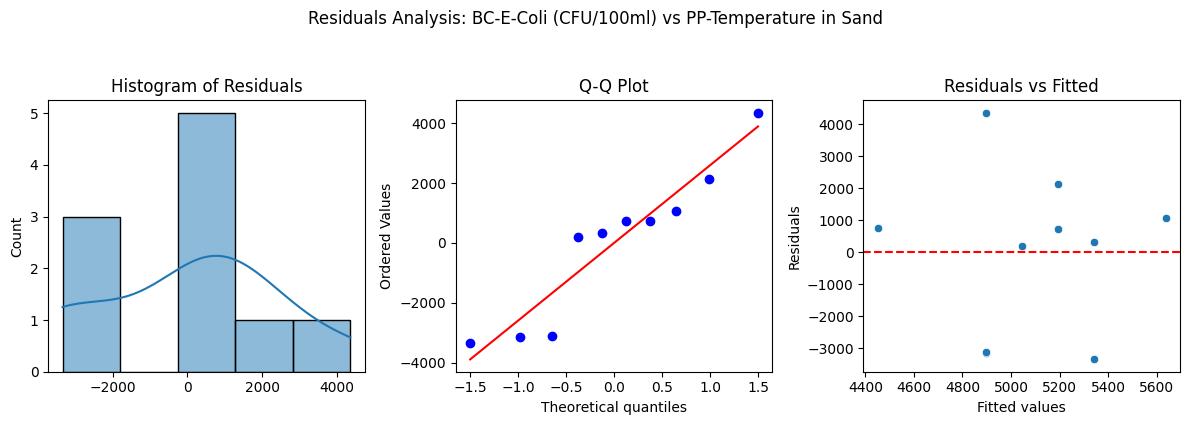


Shapiro-Wilk test for BC-E-Coli (CFU/100ml) vs PP-Temperature in Sand:
Test statistic: 0.8978, p-value: 0.2072
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 1.7% of the variance in BC-E-Coli (CFU/100ml), suggesting little relationship with PP-Temperature. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                              OLS Regression Results                             
Dep. Variable:     BC-E-Coli (CFU/100ml)   R-squared:                       0.017
Model:                               OLS   Adj. R-squared:                 -0.106
Method:                    Least Squares   F-statistic:                    0.1369
Date:                   Mon, 19 May 2025   Prob (F-statistic):              0.721
Time:                           09:49:25   Log-Likelihood:                -91.931
No. Observations:                     10   AIC:                             187.

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


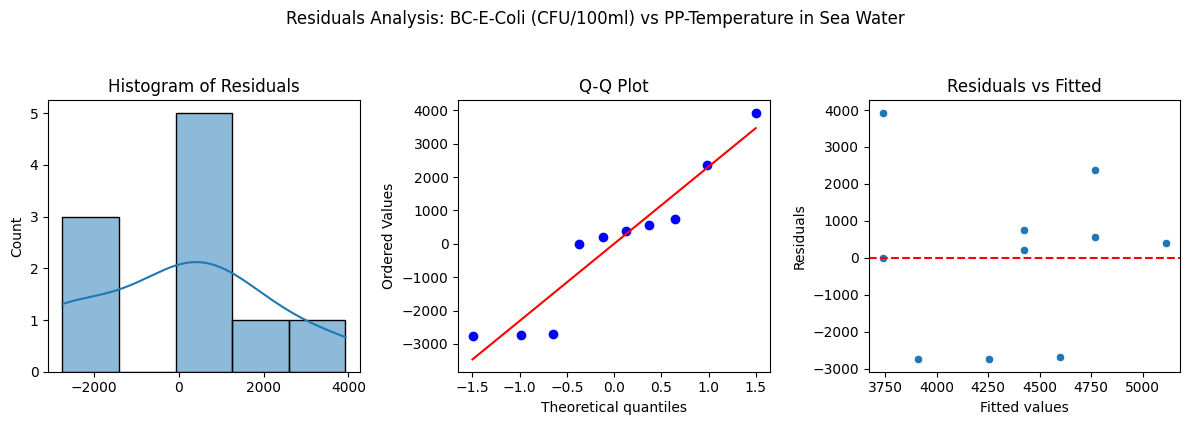


Shapiro-Wilk test for BC-E-Coli (CFU/100ml) vs PP-Temperature in Sea Water:
Test statistic: 0.9005, p-value: 0.2220
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 4.2% of the variance in BC-E-Coli (CFU/100ml), suggesting little relationship with PP-Temperature. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                              OLS Regression Results                             
Dep. Variable:     BC-E-Coli (CFU/100ml)   R-squared:                       0.042
Model:                               OLS   Adj. R-squared:                 -0.078
Method:                    Least Squares   F-statistic:                    0.3508
Date:                   Mon, 19 May 2025   Prob (F-statistic):              0.570
Time:                           09:49:25   Log-Likelihood:                -90.728
No. Observations:                     10   AIC:                            

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


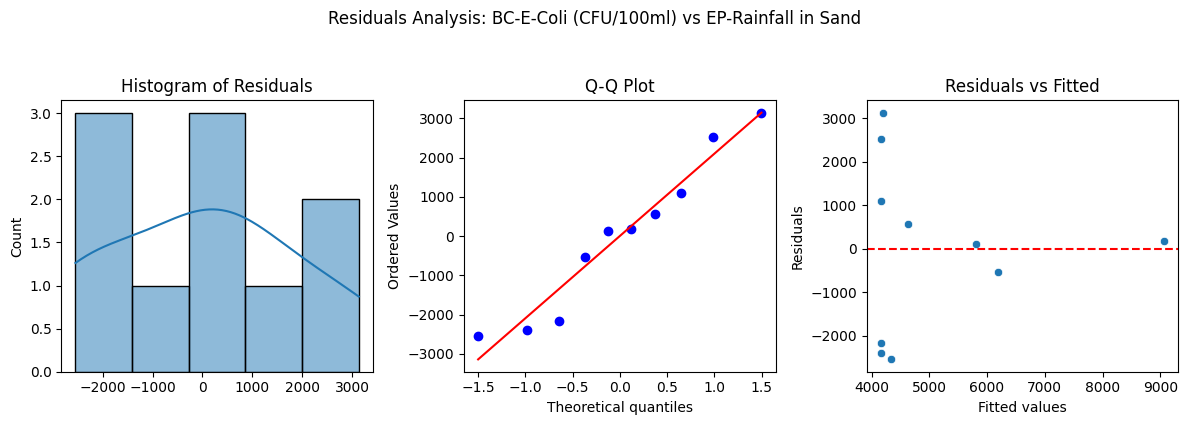


Shapiro-Wilk test for BC-E-Coli (CFU/100ml) vs EP-Rainfall in Sand:
Test statistic: 0.9338, p-value: 0.4863
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains 39.3% of the variance in BC-E-Coli (CFU/100ml), indicating a weak but potentially meaningful relationship with EP-Rainfall.
                              OLS Regression Results                             
Dep. Variable:     BC-E-Coli (CFU/100ml)   R-squared:                       0.393
Model:                               OLS   Adj. R-squared:                  0.317
Method:                    Least Squares   F-statistic:                     5.175
Date:                   Mon, 19 May 2025   Prob (F-statistic):             0.0525
Time:                           09:49:26   Log-Likelihood:                -89.522
No. Observations:                     10   AIC:                             183.0
Df Residuals:                          8   BIC:                             183.6
Df Model:          

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


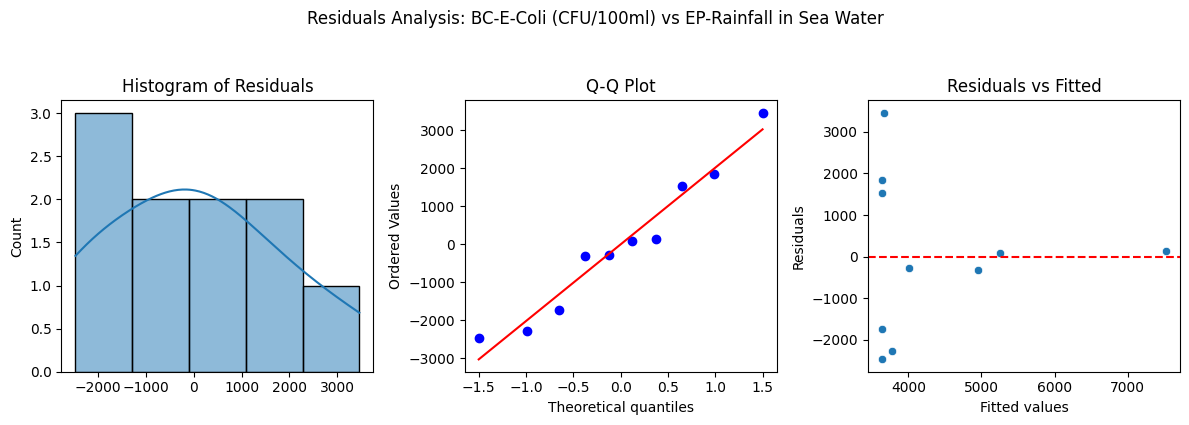


Shapiro-Wilk test for BC-E-Coli (CFU/100ml) vs EP-Rainfall in Sea Water:
Test statistic: 0.9489, p-value: 0.6558
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains 30.5% of the variance in BC-E-Coli (CFU/100ml), indicating a weak but potentially meaningful relationship with EP-Rainfall.
                              OLS Regression Results                             
Dep. Variable:     BC-E-Coli (CFU/100ml)   R-squared:                       0.305
Model:                               OLS   Adj. R-squared:                  0.218
Method:                    Least Squares   F-statistic:                     3.508
Date:                   Mon, 19 May 2025   Prob (F-statistic):             0.0979
Time:                           09:49:27   Log-Likelihood:                -89.124
No. Observations:                     10   AIC:                             182.2
Df Residuals:                          8   BIC:                             182.9
Df Model:     

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


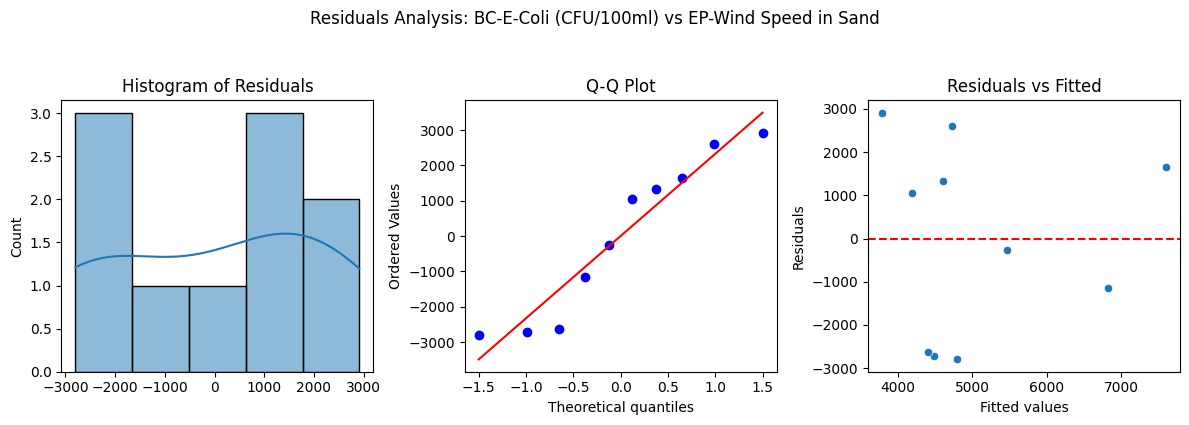


Shapiro-Wilk test for BC-E-Coli (CFU/100ml) vs EP-Wind Speed in Sand:
Test statistic: 0.8947, p-value: 0.1916
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 22.9% of the variance in BC-E-Coli (CFU/100ml), suggesting little relationship with EP-Wind Speed.
                              OLS Regression Results                             
Dep. Variable:     BC-E-Coli (CFU/100ml)   R-squared:                       0.229
Model:                               OLS   Adj. R-squared:                  0.133
Method:                    Least Squares   F-statistic:                     2.375
Date:                   Mon, 19 May 2025   Prob (F-statistic):              0.162
Time:                           09:49:27   Log-Likelihood:                -90.716
No. Observations:                     10   AIC:                             185.4
Df Residuals:                          8   BIC:                             186.0
Df Model:                            

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


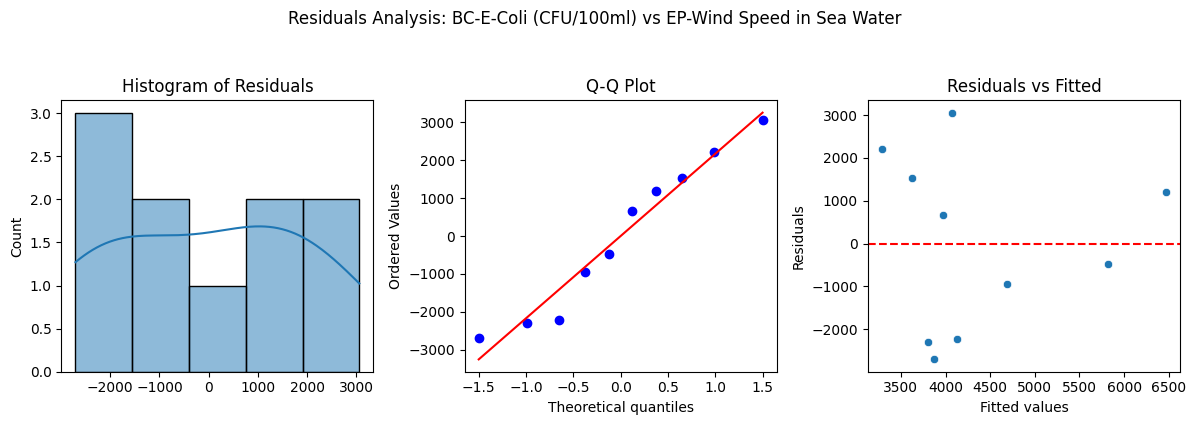


Shapiro-Wilk test for BC-E-Coli (CFU/100ml) vs EP-Wind Speed in Sea Water:
Test statistic: 0.9381, p-value: 0.5321
Residuals has a normal distribution (p > 0.05). Type: linear regression.
The model explains only 19.8% of the variance in BC-E-Coli (CFU/100ml), suggesting little relationship with EP-Wind Speed. Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model.
                              OLS Regression Results                             
Dep. Variable:     BC-E-Coli (CFU/100ml)   R-squared:                       0.198
Model:                               OLS   Adj. R-squared:                  0.097
Method:                    Least Squares   F-statistic:                     1.972
Date:                   Mon, 19 May 2025   Prob (F-statistic):              0.198
Time:                           09:49:28   Log-Likelihood:                -89.841
No. Observations:                     10   AIC:                             

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [8]:
def assess_normality_and_regress(df, bact_type, param, area):
    subset = df[df['Area'] == area].copy()

    X = subset[param]
    y = subset[bact_type]
    X = sm.add_constant(X)

    # linear regression
    linear_model = sm.OLS(y, X).fit()
    residuals = linear_model.resid

    # Plot residuals
    plt.figure(figsize=(12, 4))
    plt.suptitle(f'Residuals Analysis: {bact_type} vs {param} in {area}', y=1.05)

    #histogram
    plt.subplot(1, 3, 1)
    sns.histplot(residuals, kde=True)
    plt.title('Histogram of Residuals')
    # Quantile plot
    plt.subplot(1, 3, 2)
    stats.probplot(residuals, plot=plt)
    plt.title('Q-Q Plot')
    # scatter plot
    plt.subplot(1, 3, 3)
    sns.scatterplot(x=linear_model.fittedvalues, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals vs Fitted')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()

    # Shapiro-Wilk test for normality using residuals
    shapiro_test = stats.shapiro(residuals)
    print(f"\nShapiro-Wilk test for {bact_type} vs {param} in {area}:")
    print(f"Test statistic: {shapiro_test[0]:.4f}, p-value: {shapiro_test[1]:.4f}")

    # asssess regression type to use based on normality of residuals
    if shapiro_test[1] > 0.05:
        print("Residuals has a normal distribution (p > 0.05). Type: linear regression.")
        r_squared = linear_model.rsquared
        r_squaredadj = linear_model.rsquared_adj
        # Assess model fit based on R-squared
        if r_squared >= 0.7:
            fit_quality = "excellent"
            interpretation = f"The model explains {r_squared:.1%} of the variance in {bact_type}, indicating a strong relationship with {param}."
        elif r_squared >= 0.5:
            fit_quality = "good"
            interpretation = f"The model explains {r_squared:.1%} of the variance in {bact_type}, indicating a moderate relationship with {param}."
        elif r_squared >= 0.3:
            fit_quality = "fair"
            interpretation = f"The model explains {r_squared:.1%} of the variance in {bact_type}, indicating a weak but potentially meaningful relationship with {param}."
        else:
            fit_quality = "poor"
            interpretation = f"The model explains only {r_squared:.1%} of the variance in {bact_type}, suggesting little relationship with {param}."
        # if adjusted R-squared is substantially lower than R-squared
        if (r_squared - r_squaredadj) > 0.1:
            interpretation += " Note: The large difference between R-squared and adjusted R-squared suggests some predictors may not improve the model."
        print(interpretation)
        print(linear_model.summary())
    else:
        print("Residuals not normal (p ≤ 0.05). Type: Poisson regression.")
        # Poisson regression
        poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
        coefficients = poisson_model.params
        p_values = poisson_model.pvalues
        pseudo_r_squared = 1 - (poisson_model.deviance/poisson_model.null_deviance)

        # Calculate incidence rate ratios (IRR)
        irr = np.exp(coefficients)

        # Interpret results
        interpretations = []

        # Interpretation of model fit
        if pseudo_r_squared >= 0.3:
            fit_quality = "good"
            interpretations.append(f"Model explains {pseudo_r_squared:.1%} of variance (pseudo R²), indicating a strong relationship.")
        elif pseudo_r_squared >= 0.1:
            fit_quality = "moderate"
            interpretations.append(f"Model explains {pseudo_r_squared:.1%} of variance (pseudo R²), indicating a meaningful relationship.")
        else:
            fit_quality = "weak"
            interpretations.append(f"Model explains only {pseudo_r_squared:.1%} of variance (pseudo R²), suggesting limited predictive power.")
        # Interpretation of coefficients
        for var, coef, pval, rate_ratio in zip(coefficients.index, coefficients, p_values, irr):
            if var == 'const':
                interpretations.append(f"Baseline rate (intercept): {np.exp(coef):.2f} CFU/100ml")
                continue

            significance = "statistically significant" if pval < 0.05 else "not statistically significant"
            direction = "increase" if coef > 0 else "decrease"

            interp = (f"For each unit increase in {var}, bacterial counts {direction} by "
                 f"{abs(rate_ratio-1):.1%} (IRR = {rate_ratio:.3f}, p = {pval:.3f}) - {significance}")
            interpretations.append(interp)

        print(interpretations)
        print(poisson_model.summary())

# analysis for all combinations using weekly means
for bact in bacterial_types:
    for param in physical_params:
        for area in weekly_means['Area'].unique():
            print(f"\n{'='*80}")
            print(f"ANALYSIS FOR: {bact} vs {param} in {area} (Weekly Means)")
            print(f"{'='*80}")
            assess_normality_and_regress(weekly_means, bact, param, area)
